**В наших данных есть переменная "в закладках" (количество сохранений), мы попробуем ее предсказать, потому что эта переменная может служить эквивалентом полезности статьи**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('new_features1.csv')
df = df.drop(labels='Unnamed: 0', axis = 1)
df = df.drop(labels='Unnamed: 0.1', axis = 1)
df.head()

,item name,Время чтения,Сложность,Количество просмотров,В закладках,Комментарии,Автор,Рейтинг автора,Время публикации,Savings_per_Views,norm_ReadingTime,hour
0,Мультяшная графика продаётся лучше реалистично...,8,2,324.0,1,1,@Kallist,0.0,2023-05-13 19:20:00,0.003086,0.084337,19
1,Picture in Picture Mode в android. Показываем ...,5,1,122.0,3,0,@cookie2727,0.0,2023-05-13 18:55:00,0.024590,0.048193,18
2,"Много нас, а GPU один. Как делиться?",6,1,1600.0,5,6,@Antra,6.1,2023-05-13 17:57:00,0.003125,0.060241,17
3,Ближайшие бесплатные мероприятия по разработке...,2,1,376.0,1,0,@ITMeeting,-0.8,2023-05-13 16:27:00,0.002660,0.012048,16
4,Одноплатник Orange Pi 5 Plus: характеристики и...,4,",",3500.0,6,13,@Seleditor,49.0,2023-05-13 12:55:00,0.001714,0.036145,12


In [3]:
df.isnull().sum()

item name                0
Время чтения             0
Сложность                0
Количество просмотров    0
В закладках              0
Комментарии              0
Автор                    4
Рейтинг автора           4
Время публикации         0
Savings_per_Views        0
norm_ReadingTime         0
hour                     0
dtype: int64

In [4]:
df=df.dropna()
df.isnull().sum()

item name                0
Время чтения             0
Сложность                0
Количество просмотров    0
В закладках              0
Комментарии              0
Автор                    0
Рейтинг автора           0
Время публикации         0
Savings_per_Views        0
norm_ReadingTime         0
hour                     0
dtype: int64

#### Обучим простую линейную модель с одним признаком вида $y = w_0 + w_1x$

In [5]:
from sklearn.model_selection import train_test_split 

df_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

y_train = df_train['В закладках']
y_test = df_test['В закладках']

X_train = df_train[['Количество просмотров']]
X_test = df_test[['Количество просмотров']]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
print (f'w1 = {model_regression.coef_}, w0 = {model_regression.intercept_}')

w1 = [0.00280963], w0 = 18.78792411796073


#### Построим прогнозы на тестовой выборке

In [7]:
y_pred_regr = model_regression.predict(X_test)

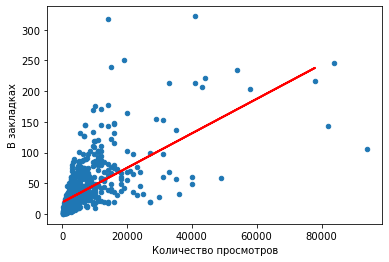

In [15]:
df.plot(kind='scatter', x='Количество просмотров', y='В закладках')

plt.plot(X_test, y_pred_regr, c='red', linewidth=2)
plt.show()

In [9]:
from sklearn import metrics
def print_metrics(y_test,y_pred_regr):
    print('MAE:', "%.4f" % metrics.mean_absolute_error(y_test, y_pred_regr))
    print('RMSE:', "%.4f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_regr)))
    print('MAPE:', "%.4f" % metrics.mean_absolute_percentage_error(y_test,y_pred_regr))

print_metrics(y_test, y_pred_regr)

MAE: 16.9804
RMSE: 26.6962
MAPE: 0.7892


In [10]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=20)

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

print_metrics(y_test, y_pred_knn)

MAE: 16.5545
RMSE: 27.0560
MAPE: 0.6356


Качество модели немного улучшилось

### Теперь возьмем несколько признаков

In [19]:
y_train = df_train['В закладках']
y_test = df_test['В закладках']

X_train = df_train[['Количество просмотров', 'Savings_per_Views', 'Время чтения', 'Комментарии', 'Рейтинг автора']]
X_test = df_test[['Количество просмотров', 'Savings_per_Views', 'Время чтения', 'Комментарии', 'Рейтинг автора']]

In [20]:
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

print (f'{model_regression.coef_}, {model_regression.intercept_}')

[ 3.39795590e-03  2.87045735e+03  1.60774719e-01 -8.62094194e-02
  6.37745595e-02], -11.527248325707781


In [22]:
y_pred_regr = model_regression.predict(X_test)
print_metrics(y_test, y_pred_regr)

MAE: 13.3040
RMSE: 21.9857
MAPE: 0.4492


Получили улучшение качества модели, однако не удалось достичь хороших показателей, так как на сохранения влияют и многие другие причины, к тому же все используемые признаки коррелируют, но слабо с числом сохранений.